#### Will use database loan200.csv

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv("./loan200.csv")
df.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [70]:
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

In [71]:
X = df[predictors]
Y = df[outcome]

In [72]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [83]:
Ks = 40
mean_array = np.zeros((Ks-1))
std_array = np.zeros((Ks-1))

for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    mean_array[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_array[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])  # Standard Error of the Mean SEM

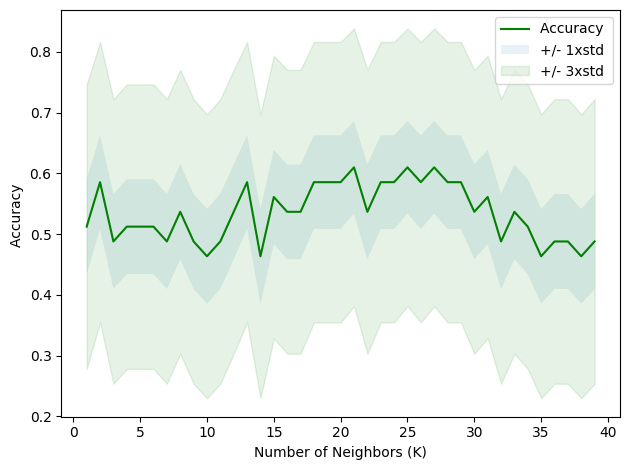

In [84]:
plt.plot(range(1,Ks),mean_array,'g')
plt.fill_between(range(1,Ks),mean_array - 1 * std_array,mean_array + 1 * std_array, alpha=0.10)
plt.fill_between(range(1,Ks),mean_array - 3 * std_array,mean_array + 3 * std_array, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [85]:
print(f"The best accuracy is: {mean_array.max()} and its position is: {mean_array.argmax()+1}")

The best accuracy is: 0.6097560975609756 and its position is: 21
